# Logistic Regression

# Introduction
Logistic Regression is a statistical method used for binary classification tasks. Despite its name, it's a classification algorithm, not a regression one. It's commonly employed when the target variable is categorical and the aim is to predict the probability of a sample belonging to a specific class.

# Algorithm
The algorithm uses the logistic function (also known as the sigmoid function) to map predicted values to probabilities. It models the relationship between a dependent variable and one or more independent variables by estimating probabilities using the logistic function. It applies the logistic function to the linear combination of the input features, which outputs probabilities. Based on these probabilities, it predicts the class label.

# Advantages


1.   Simple and Efficient: Logistic Regression is easy to implement and interpret, making it a great starting point for many classification problems.
2.   Provides Probabilities: It offers probabilities for outcomes, enabling threshold tuning for better trade-offs between precision and recall.
3. Less Prone to Overfitting: It tends to be less prone to overfitting compared to more complex models when dealing with smaller datasets.


# Disadvantages


1.   Linear Decision Boundary: It assumes a linear relationship between the features and the log-odds of the response.
2.   Doesn't Perform Well with Complex Relationships: If the relationship between features and the target is highly non-linear, logistic regression may not perform well.
3. Assumes Independence of Observations: It assumes observations are independent, which might not hold true in some real-world scenarios



Overall, Logistic Regression is a valuable tool for binary classification tasks due to its simplicity, interpretability, and efficiency, especially when the relationship between features and the outcome is predominantly linear. However, its performance might suffer in more complex situations with intricate feature relationships.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns

In [2]:
class gradient_descent_Logit_R():
    # initialize
    def __init__(self) -> None:
        # Initializing variables
        self.X = None  # Feature matrix
        self.variables = None  # Feature names
        self.y = None  # Target variable
        self.predictor = None  # Target variable name
        self.n = None  # Number of samples
        self.p = None  # Number of features
        self.bias = None  # Boolean for bias term
        self.gamma = None  # Learning rate
        self.max_iter = None  # Maximum number of iterations
        self.eta = None  # Convergence criterion

        self.weights = None  # Model weights
        self.weights_history = []  # History of weights during iterations
        self.loss_history = [np.inf]  # Loss history with initial value as infinity

    # Cross-entropy loss of one data point
    def cross_entropy_loss(self, y, y_hat):
        return -y * np.log(y_hat) - (1.0 - y) * np.log(1.0 - y_hat)

    # Total cross-entropy loss
    def loss(self):
        # Compute total loss across all samples
        total_loss = sum(self.cross_entropy_loss(self.y[i], self.sigmoid(x @ self.weights)) for i, x in enumerate(self.X))
        return total_loss

    # Sigmoid function
    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    # Gradient of the loss
    def gradient_L(self):
        # Compute gradient of the loss function
        sigmoids = np.array([self.sigmoid(x @ self.weights) - self.y[i] for i, x in enumerate(self.X)])
        d_w = sigmoids @ self.X
        return d_w

    # Model fitting
    def fit(self, X, y, bias=True, gamma=0.01, max_iter=100, eta=0.001):
        # Data preprocessing and setting initial parameters
        self.variables = X.columns
        self.predictor = y.name

        X = X.to_numpy()
        y = y.to_numpy()
        if bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        self.X = X
        self.y = y
        self.n = X.shape[0]
        self.p = X.shape[1]
        self.bias = bias
        self.gamma = gamma
        self.max_iter = max_iter
        self.eta = eta

        weights = np.random.rand(self.p)  # Initializing weights randomly
        self.weights = weights
        self.weights_history.append(weights)
        for i in range(1, max_iter + 1):
            dw = self.gradient_L()
            weights = weights - gamma * dw  # Update weights using gradient descent
            self.weights = weights
            self.weights_history.append(weights)
            L = self.loss()
            self.loss_history.append(L)
            if i >= self.max_iter or abs(L - self.loss_history[i - 1]) <= self.eta:
                break

    # Predict new data
    def prediction(self, X, weights):
        # Predicting target values for new data
        X = X.to_numpy()
        if self.bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        labels = np.array([1, 0])
        y_hat = [self.sigmoid(x @ weights) for x in X]
        return [np.random.choice(labels, p=[y_hat_i, 1.0 - y_hat_i]) for y_hat_i in y_hat]


## Applications on data sets

We test decistion tree on the wine data set from sklearn.datasets

Load wine data, and only pick first 2 types of wines.

In [3]:
# Loading the wine dataset and excluding the class with label '2'
X, y = load_wine(return_X_y=True, as_frame=True)
X = X[y != 2]  # Exclude class label '2' from features
y = y[y != 2]  # Exclude class label '2' from target

# Standardizing the features using StandardScaler
X_scaler = StandardScaler()
X_scaled = pd.DataFrame(X_scaler.fit_transform(X))  # Fit and transform the features to have mean=0 and variance=1
X_scaled.head()  # Displaying the first few rows of the standardized feature matrix


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.452455,-0.294414,0.302478,-0.940375,1.768686,0.510421,0.775592,-0.462247,1.000229,0.892384,-0.112428,2.040025,0.782868
1,0.289066,-0.214558,-0.677197,-2.239324,0.006527,0.234327,0.367386,-0.646296,-0.878867,0.114374,-0.052918,0.941437,0.740152
2,0.243886,0.447106,1.113242,-0.054728,0.071792,0.510421,1.020516,-0.278198,1.967684,0.917082,-0.171937,0.455524,1.124598
3,1.610586,-0.020622,0.538951,-0.586117,0.854974,2.443085,1.360688,-0.830346,0.795575,2.226115,-1.183603,1.047071,1.964684
4,0.334246,0.709490,1.788880,0.653789,1.181300,0.510421,0.272138,0.550024,0.125798,0.077326,-0.112428,-0.051517,-0.156889


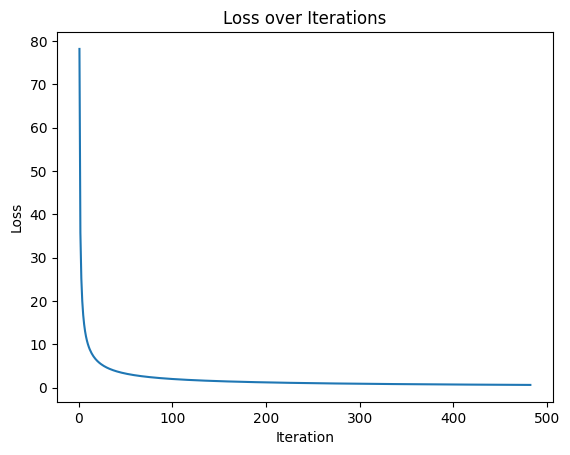

In [4]:
# Splitting the standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=24)

# Instantiating the gradient descent logistic regression model and fitting it with training data
model = gradient_descent_Logit_R()
model.fit(X_train, y_train, gamma=0.01, max_iter=1000)

# Plotting the loss history over iterations
plt.plot(model.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()  # Displaying the plot showing the decrease in loss over iterations during model training


To predict test data, calculate accuracy, and visualize the confusion matrix, you can use the following code:

In [5]:
# Predicting the target labels for the test set using the model
y_pred = model.prediction(X_test, model.weights)

# Calculating and displaying the accuracy score of the logistic regression model
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic regression, accuracy score = {accuracy}')


Logistic regression, accuracy score = 1.0


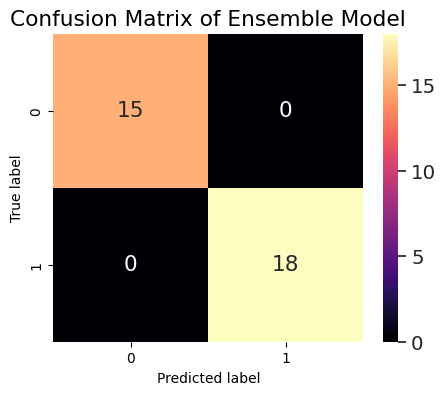

In [6]:
# Calculating the confusion matrix using predicted and actual labels
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Creating a DataFrame to visualize the confusion matrix
matrix_df = pd.DataFrame(confusion_matrix)

# Setting up the plot size and axes
plt.figure(figsize=(5,4))
ax = plt.axes()
sns.set(font_scale=1.3)  # Setting font scale for readability

# Creating a heatmap to visualize the confusion matrix
sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')

# Setting title and labels for better understanding
ax.set_title('Confusion Matrix of Ensemble Model')
ax.set_xlabel('Predicted label', fontsize=10)
ax.set_ylabel('True label', fontsize=10)

# Displaying the confusion matrix heatmap
plt.show()
